**Laboratório de Inovação e Automação 1 (LIA 1) - Aula 19 TensorFlow**

---

**ALUNO:** Samuel França da Costa Pedrosa

**MATRÍCULA:** 201900261

---



In [1]:
!pip install -q tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.5 MB/s eta 0:00:00


In [2]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [10]:
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [11]:
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
imagens_treino = imagens_treino/255.0
imagens_teste = imagens_teste/255.0

In [13]:
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

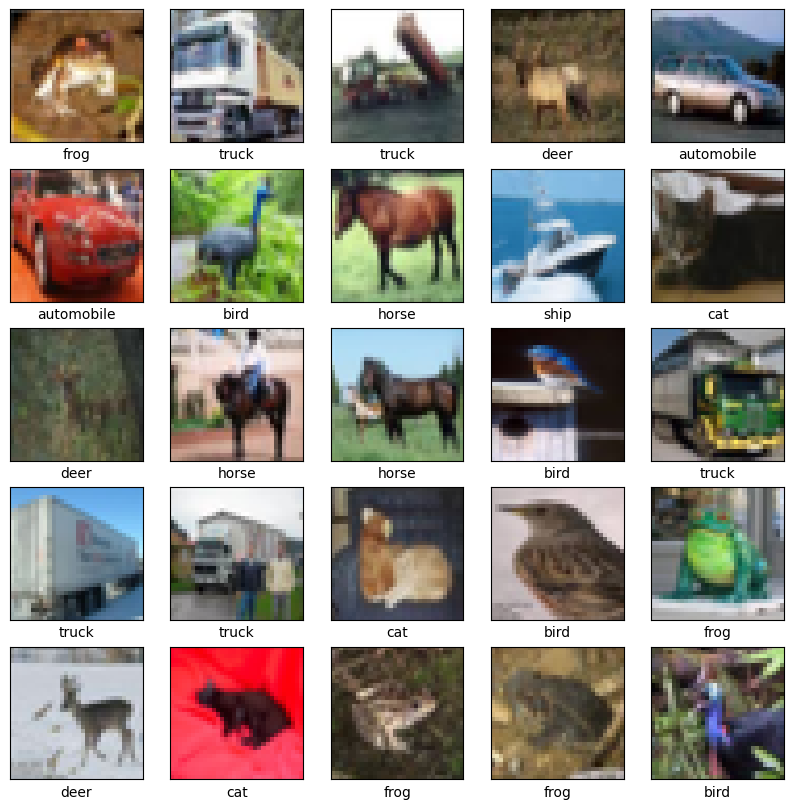

In [14]:
visualiza_imagens(imagens_treino, labels_treino)

In [15]:
modelo_lia = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [16]:
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [17]:
modelo_lia.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [18]:
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [19]:
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 103s 64ms/step - loss: 1.5861 - accuracy: 0.4201 - val_loss: 1.3112 - val_accuracy: 0.5297
Epoch 2/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2404 - accuracy: 0.5574 - val_loss: 1.1969 - val_accuracy: 0.5727
Epoch 3/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1040 - accuracy: 0.6090 - val_loss: 1.0895 - val_accuracy: 0.6080
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.0100 - accuracy: 0.6441 - val_loss: 1.0448 - val_accuracy: 0.6350
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9397 - accuracy: 0.6713 - val_loss: 1.0027 - val_accuracy: 0.6525
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8840 - accuracy: 0.6895 - val_loss: 0.9402 - val_accuracy: 0.6809
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8376 - accuracy: 0.7058 - val_loss: 0.9442 

In [20]:
erro_teste, acc_teste = modelo_lia.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 5s - loss: 0.9316 - accuracy: 0.6909 - 5s/epoch - 17ms/step


In [21]:
nova_imagem = Image.open("/content/nova_imagem.jpg")
largura = nova_imagem.width
altura = nova_imagem.height
nova_imagem = nova_imagem.resize((32, 32))
nova_imagem_array = np.array(nova_imagem) / 255.0
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [29]:
previsoes = modelo_lia.predict(nova_imagem_array)
previsoes

1/1 [==============================] - 0s 26ms/step


array([[5.8609061e-03, 9.6638161e-01, 1.1615788e-05, 8.7177904e-07,
        1.1213530e-07, 1.4460967e-08, 4.6941270e-05, 4.5972749e-07,
        2.2703340e-05, 2.7674770e-02]], dtype=float32)

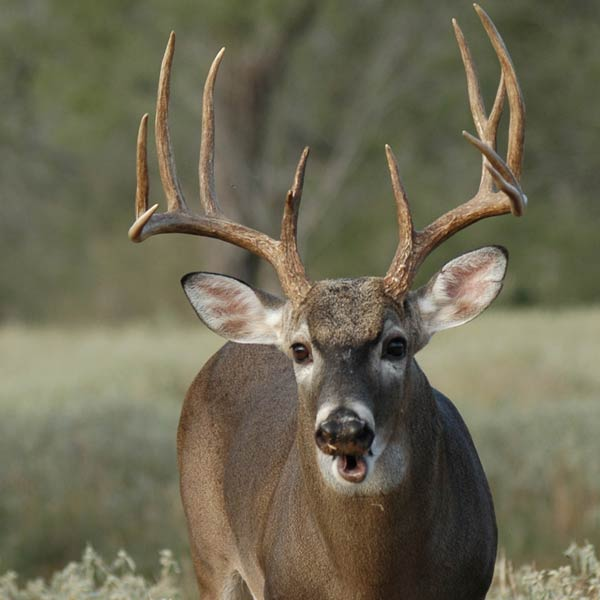

In [33]:
nova_imagem = Image.open("/content/What-Do-Deer-See-Lead.jpg")
largura = nova_imagem.width
altura = nova_imagem.height
nova_imagem = nova_imagem.resize((32, 32))
nova_imagem_array = np.array(nova_imagem) / 255.0
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [32]:
previsoes = modelo_lia.predict(nova_imagem_array)
print(nomes_classes)
previsoes

1/1 [==============================] - 0s 247ms/step
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


array([[7.3277345e-03, 3.6119260e-07, 1.5383404e-01, 9.6070347e-04,
        1.8928887e-03, 2.1200703e-02, 3.9044846e-07, 8.1458616e-01,
        1.7185265e-07, 1.9687667e-04]], dtype=float32)